In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset-

titanic=sns.load_dataset("titanic")

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#1)What is the overall distribution of passengers across different classes (Pclass)?


In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic['pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


<ipython-input-8-af76cd3235e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass',data=titanic,palette="viridis")


([<matplotlib.axis.XTick at 0x7a7e716f8b90>,
 [Text(0, 0, '1st class'), Text(1, 0, '2nd class'), Text(2, 0, '3rd class')])

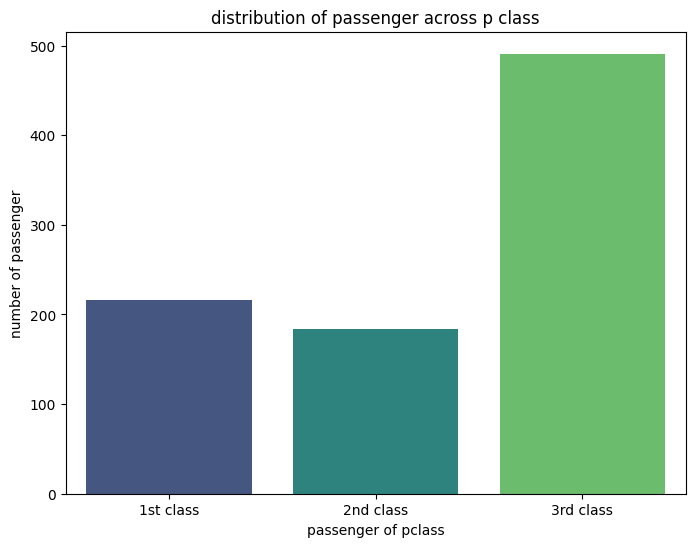

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='pclass',data=titanic,palette="viridis")
plt.title("distribution of passenger across p class")
plt.xlabel("passenger of pclass")
plt.ylabel("number of passenger")
plt.xticks([0,1,2],['1st class','2nd class','3rd class'])

In [ ]:
#2)How is the age of passengers distributed?

In [ ]:
titanic['age'].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
titanic['age'].isnull().sum()

177

<Axes: xlabel='age'>

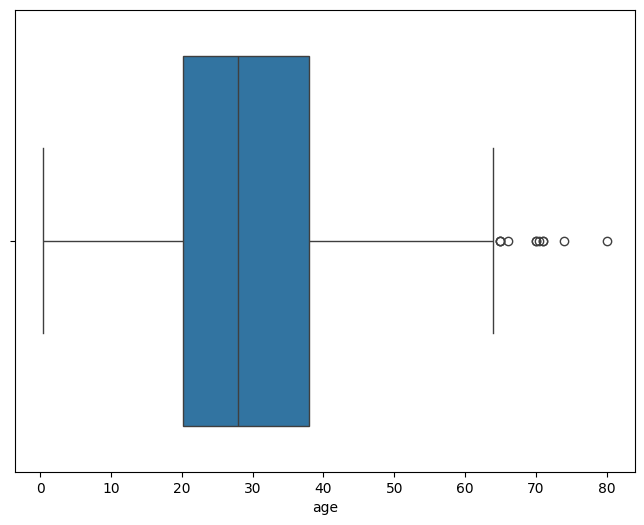

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=titanic['age'])

In [ ]:
Q1 = titanic['age'].quantile(0.25)
Q2 = titanic['age'].quantile(0.50)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -1.5 *IQR
higher_bound = Q3 + 1.5 * IQR

In [ ]:
higher_bound

64.8125

In [ ]:
lower_bound

-6.6875

<Axes: xlabel='age', ylabel='Count'>

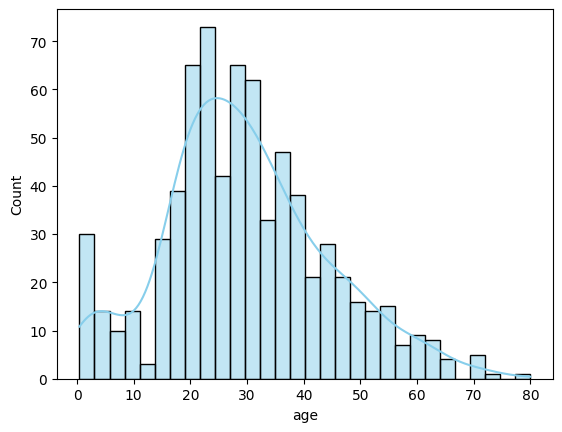

In [ ]:
sns.histplot(titanic['age'].dropna(),
             kde = True, bins = 30, color = 'skyblue' )

In [ ]:
#lets check whether the outlier affect the distribution or not

In [ ]:
titanic_filters = titanic[(titanic['age']>=lower_bound) & (titanic['age']<= higher_bound)]

<Axes: xlabel='age', ylabel='Count'>

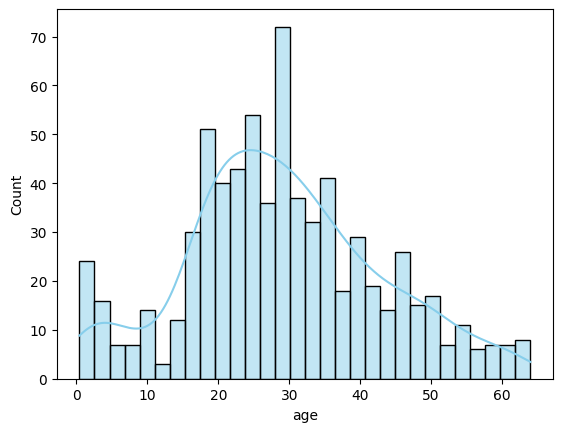

In [ ]:
sns.histplot(titanic_filters['age'].dropna(),
             kde = True, bins = 30, color = 'skyblue' )

In [ ]:
#lets check and replace the missing values and then check the distribution

<Axes: xlabel='age', ylabel='Count'>

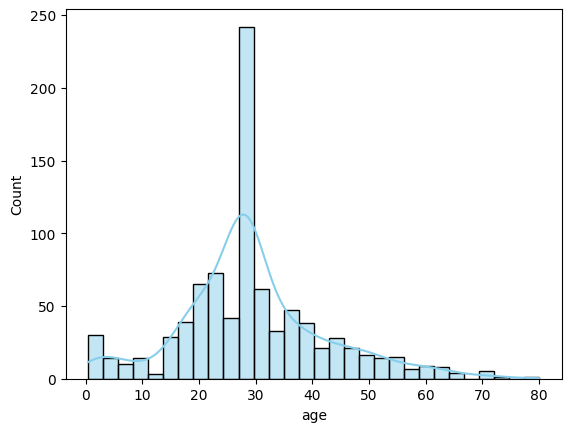

In [ ]:
sns.histplot(titanic['age'].fillna(titanic['age'].median()),
             kde = True, bins = 30, color = 'skyblue' )

In [ ]:
#3)What is the distribution of passengers based on Sex?

In [ ]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


<ipython-input-23-1dca2cf58eb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic['sex'],palette='viridis')


<Axes: xlabel='sex', ylabel='count'>

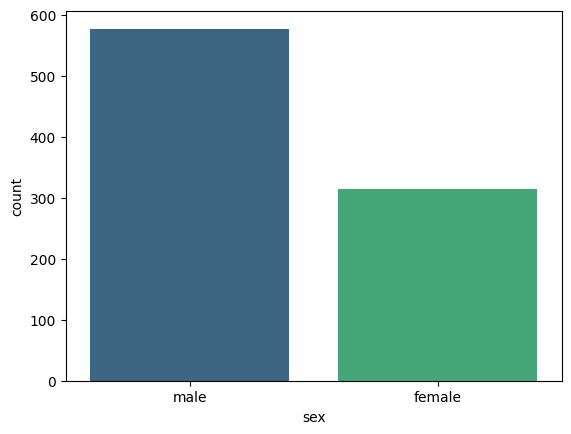

In [ ]:
sns.countplot(x=titanic['sex'],palette='viridis')

In [ ]:
#4)How many passengers embarked from each port (Embarked)?

In [ ]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic['embarked'].isnull().sum()

2

In [ ]:
titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


<ipython-input-27-5020fe52ef7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic['embarked'],palette='viridis')


<Axes: xlabel='embarked', ylabel='count'>

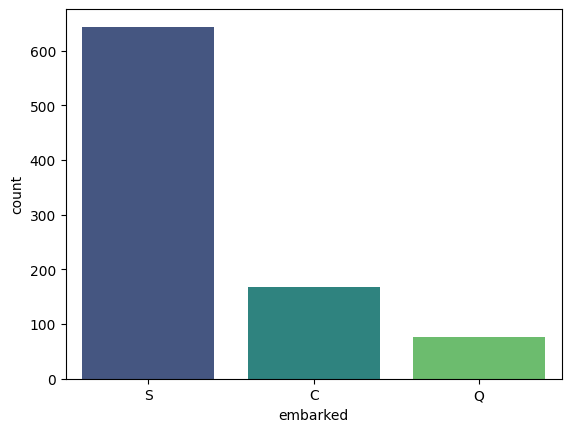

In [ ]:
sns.countplot(x=titanic['embarked'],palette='viridis')

In [ ]:
#5)What is the survival rate overall, and how does it vary by Pclass?


In [ ]:
titanic['pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


<ipython-input-30-ab94e87b3763>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic['pclass'],palette='viridis')


<Axes: xlabel='pclass', ylabel='count'>

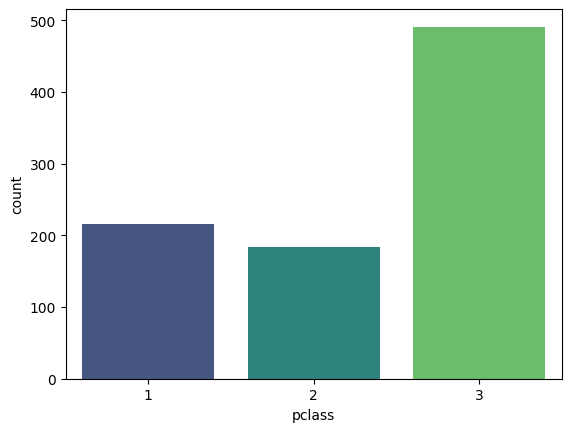

In [ ]:
sns.countplot(x=titanic['pclass'],palette='viridis')

In [ ]:
overall_survival_rate=titanic['survived'].mean()*100

In [ ]:
overall_survival_rate

38.38383838383838

In [ ]:
survival_rate_by_pclass=titanic.groupby('pclass')['survived'].mean()*100

In [ ]:
survival_rate_by_pclass

,survived
pclass,
1,62.962963
2,47.282609
3,24.236253


<ipython-input-35-fb63a5c0c53a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_pclass.index,y=survival_rate_by_pclass.values,palette='viridis')


<Axes: xlabel='pclass'>

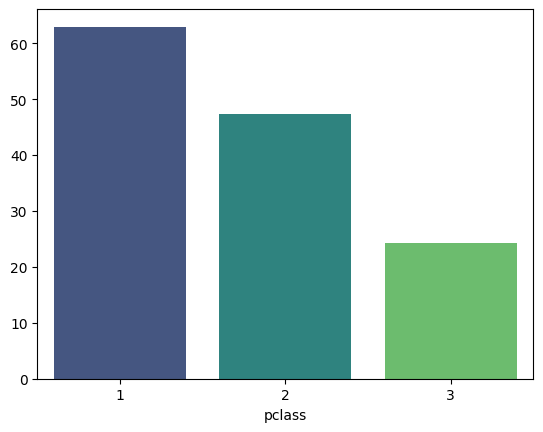

In [ ]:
sns.barplot(x=survival_rate_by_pclass.index,y=survival_rate_by_pclass.values,palette='viridis')

In [ ]:
#6)What is the survival rate for males vs. females?

In [ ]:
survival_rate_by_sex=titanic.groupby('sex')['survived'].mean()*100

In [ ]:
survival_rate_by_sex

,survived
sex,
female,74.203822
male,18.890815


<ipython-input-38-b8d9dd74e78f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_sex.index,y=survival_rate_by_sex.values,palette='viridis')


<Axes: xlabel='sex'>

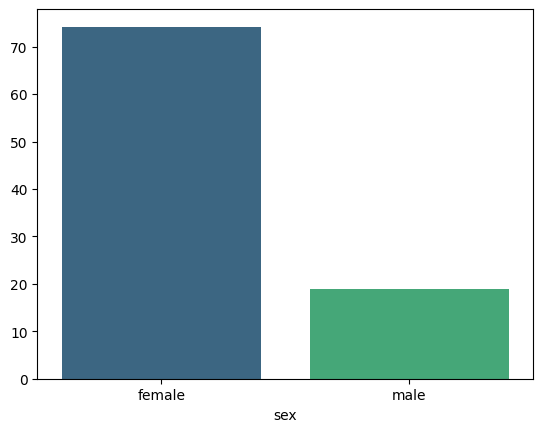

In [ ]:
sns.barplot(x=survival_rate_by_sex.index,y=survival_rate_by_sex.values,palette='viridis')

In [ ]:
#7)What is the survival rate for passengers from different embarkation points (Embarked)?

In [ ]:
survival_rate_by_embarked=titanic.groupby('embarked')['survived'].mean()*100

In [ ]:
survival_rate_by_embarked

,survived
embarked,
C,55.357143
Q,38.961039
S,33.695652


<ipython-input-41-1bee30b60be9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_embarked.index,y=survival_rate_by_embarked.values,palette='viridis')


<Axes: xlabel='embarked'>

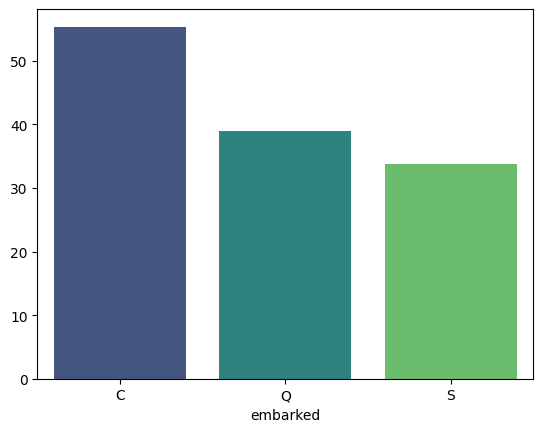

In [ ]:
sns.barplot(x=survival_rate_by_embarked.index,y=survival_rate_by_embarked.values,palette='viridis')

In [ ]:
#8)Is there any relationship between the number of siblings/spouses aboard (SibSp) and
survival?

In [ ]:
survival_rate_by_sibsp=titanic.groupby('sibsp')['survived'].mean()*100

In [ ]:
survival_rate_by_sibsp

,survived
sibsp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


<ipython-input-44-3aba7a1aba75>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_sibsp.index,y=survival_rate_by_sibsp.values,palette='viridis')


<Axes: xlabel='sibsp'>

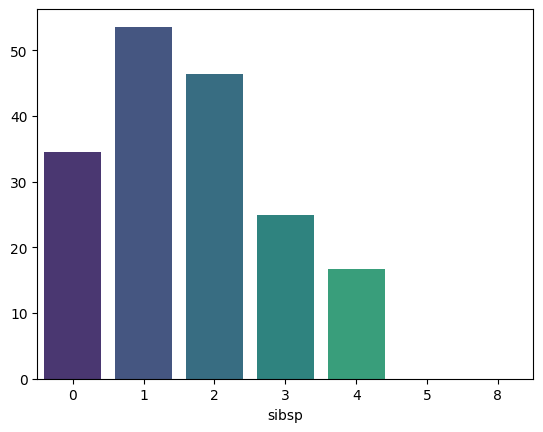

In [ ]:
sns.barplot(x=survival_rate_by_sibsp.index,y=survival_rate_by_sibsp.values,palette='viridis')

In [ ]:
titanic[titanic['sibsp'].isin([5,8])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False
71,0,3,female,16.0,5,2,46.90,S,Third,woman,False,NaN,Southampton,no,False
159,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
386,0,3,male,1.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False
480,0,3,male,9.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False
683,0,3,male,14.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False
792,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
#9)How does the number of parents/children aboard (Parch) affect survival?

In [ ]:
survival_rate_by_parch=titanic.groupby('parch')['survived'].mean()*100

In [ ]:
survival_rate_by_parch

,survived
parch,
0,34.365782
1,55.084746
2,50.000000
3,60.000000
4,0.000000
5,20.000000
6,0.000000


<ipython-input-48-60b9018e9c6b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_parch.index,y=survival_rate_by_parch.values,palette='rocket')


<Axes: xlabel='parch'>

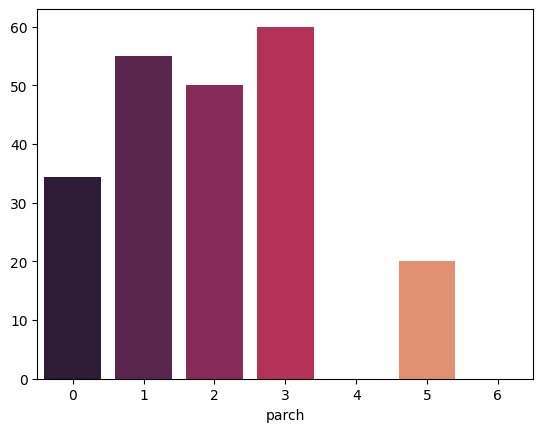

In [ ]:
sns.barplot(x=survival_rate_by_parch.index,y=survival_rate_by_parch.values,palette='rocket')

In [ ]:
titanic[titanic['parch'].isin([4,6])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,Family,faamilysize,fare_outlier,age_cat
167,0,3,female,45.0,1,4,27.900,S,Third,woman,False,NaN,Southampton,no,False,41-50,True,6,normal fare,middle_age
360,0,3,male,40.0,1,4,27.900,S,Third,man,True,NaN,Southampton,no,False,41-50,True,6,normal fare,adult
438,0,1,male,64.0,1,4,263.000,S,First,man,True,C,Southampton,no,False,61-70,True,6,High fare,senior
567,0,3,female,29.0,0,4,21.075,S,Third,woman,False,NaN,Southampton,no,False,21-30,True,5,normal fare,adult
678,0,3,female,43.0,1,6,46.900,S,Third,woman,False,NaN,Southampton,no,False,41-50,True,8,normal fare,middle_age


In [ ]:
#10)How does the fare distribution vary across different passenger classes (Pclass)?

In [ ]:
fare_dist_by_pclass=titanic.groupby('pclass')['fare']

In [ ]:
fare_dist_by_pclass.describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


<ipython-input-52-1166ce788c04>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass',y='fare',data=titanic,palette='viridis')


<Axes: xlabel='pclass', ylabel='fare'>

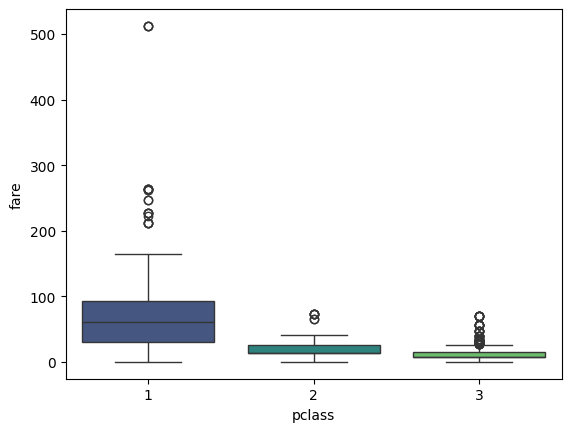

In [ ]:
sns.boxplot(x='pclass',y='fare',data=titanic,palette='viridis')

<Axes: xlabel='fare', ylabel='Density'>

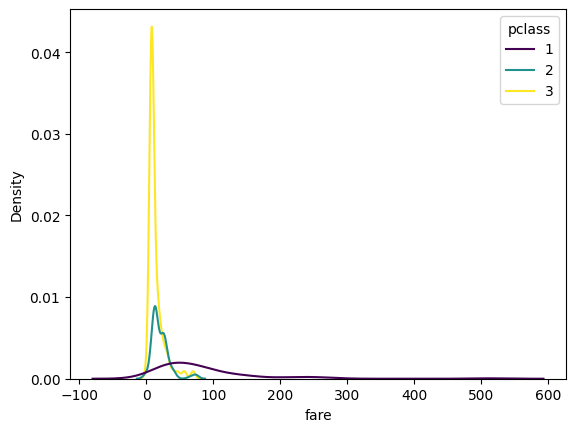

In [ ]:
sns.kdeplot(x='fare',data=titanic,hue='pclass',palette='viridis')

In [ ]:
#11)What is the relationship between age and survival rates?

In [ ]:
titanic['age'].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
bins=[0,10,20,30,40,50,60,70,80,np.inf]

In [ ]:
labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","80+"]

In [ ]:
titanic['age_group']=pd.cut(titanic['age'],bins=bins,labels=labels,right=False)

In [ ]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,21-30


In [ ]:
survival_rate_by_age_group=titanic.groupby('age_group')['survived'].mean()*100

<ipython-input-59-4fd9013b458f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group=titanic.groupby('age_group')['survived'].mean()*100


In [ ]:
survival_rate_by_age_group

,survived
age_group,
0-10,61.290323
11-20,40.196078
21-30,35.000000
31-40,43.712575
41-50,38.202247
51-60,41.666667
61-70,31.578947
71-80,0.000000
80+,100.000000


<ipython-input-61-30a085f3a206>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_age_group.index,y=survival_rate_by_age_group.values,palette='Set2')


<Axes: xlabel='age_group'>

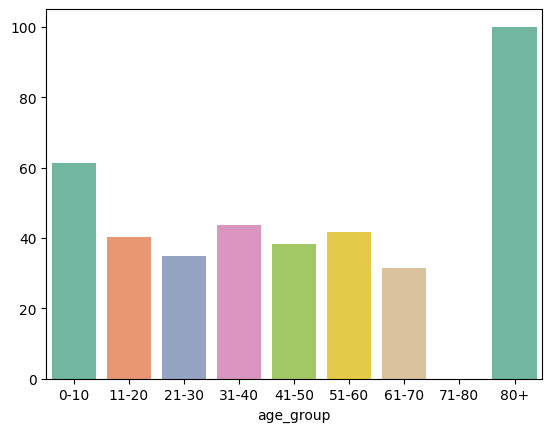

In [ ]:
sns.barplot(x=survival_rate_by_age_group.index,y=survival_rate_by_age_group.values,palette='Set2')

In [ ]:
#12What is the correlation between Fare, Pclass, and survival?

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_group    714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.9+ KB


In [ ]:
correlation_matrix=titanic[['fare','pclass','survived']].corr()

In [ ]:
correlation_matrix


,fare,pclass,survived
fare,1.000000,-0.549500,0.257307
pclass,-0.549500,1.000000,-0.338481
survived,0.257307,-0.338481,1.000000


<Axes: >

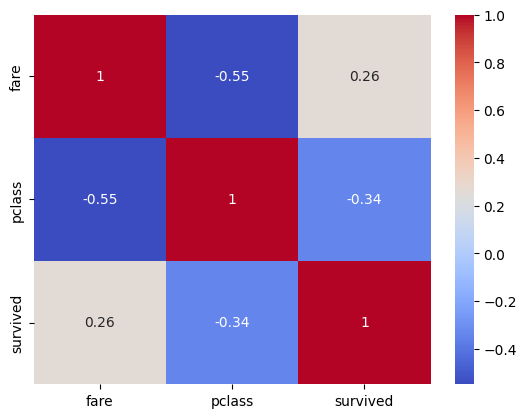

In [ ]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [ ]:
#13)What are the age ranges of survivors vs. non-survivors?

In [ ]:
age_group_by_survived=titanic.groupby('age_group')['survived']

<ipython-input-66-244018705f42>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_by_survived=titanic.groupby('age_group')['survived']


In [ ]:
age_group_by_survived.value_counts().unstack()

survived,0,1
age_group,,
0-10,24,38
11-20,61,41
21-30,143,77
31-40,94,73
41-50,55,34
51-60,28,20
61-70,13,6
71-80,6,0
80+,0,1


<Axes: xlabel='age_group', ylabel='Count'>

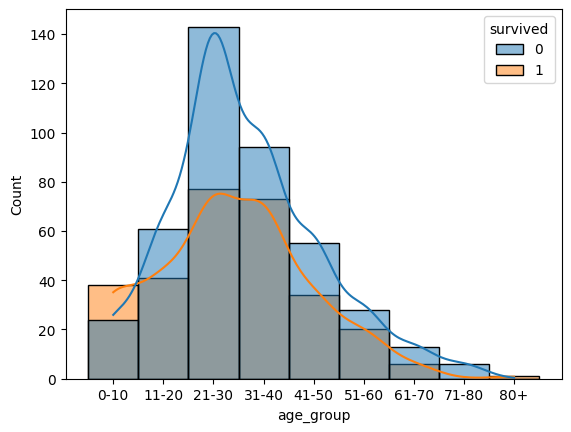

In [ ]:
sns.histplot(data=titanic,x='age_group',hue='survived',kde=True)

In [ ]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,21-30


In [ ]:
#14)What is the survival rate for families (passengers with SibSp or Parch > 0) vs. solo travelers?


In [ ]:
titanic['Family']=(titanic['sibsp']>0) | (titanic['parch']>0)

In [ ]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,Family
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,21-30,True


In [ ]:
survived_by_family=titanic.groupby('Family')['survived'].mean()*100

In [ ]:
survived_by_family

,survived
Family,
False,30.353818
True,50.564972


<Axes: xlabel='Family', ylabel='count'>

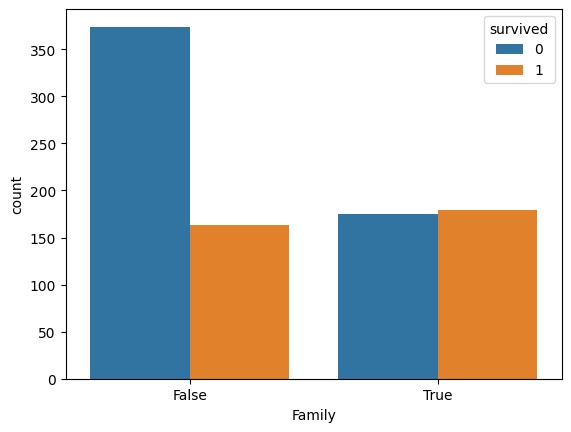

In [ ]:
sns.countplot(x='Family', hue='survived',data=titanic)

In [ ]:
#15)What is the distribution of family sizes among passengers, and how does it affect survival?


In [ ]:
titanic.groupby('Family')['survived'].value_counts().unstack()

survived,0,1
Family,,
False,374,163
True,175,179


In [ ]:
titanic['faamilysize']=titanic['sibsp']+titanic['parch']+1

In [ ]:
titanic['faamilysize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

<Axes: xlabel='faamilysize', ylabel='count'>

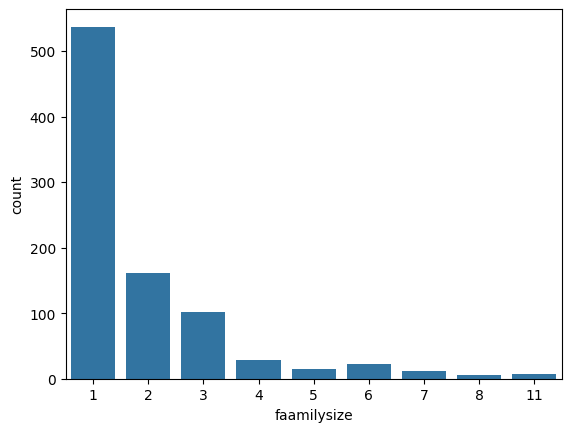

In [ ]:
sns.countplot(x='faamilysize',data=titanic)

In [ ]:
titanic['faamilysize'].value_counts()

,count
faamilysize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [ ]:
survived_by_familysize=titanic.groupby('faamilysize')['survived'].value_counts().unstack()

In [ ]:
survived_by_familysize

survived,0,1
faamilysize,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0
6,19.0,3.0
7,8.0,4.0
8,6.0,NaN
11,7.0,NaN


<Axes: xlabel='faamilysize', ylabel='count'>

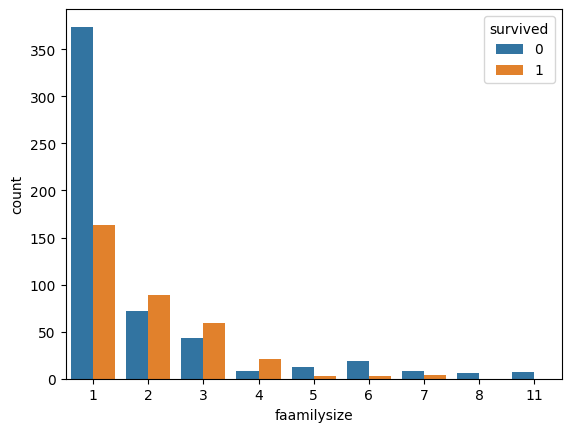

In [ ]:
sns.countplot(x='faamilysize',data=titanic,hue='survived')

In [ ]:
#16)How does survival differ for passengers who paid exceptionally high fares (Fare outliers)?

In [ ]:
titanic['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='fare'>

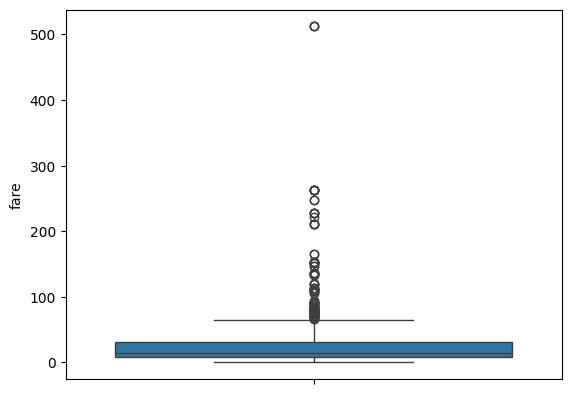

In [ ]:
sns.boxplot(titanic['fare'])

In [ ]:
Q1=titanic['fare'].quantile(0.25)
Q2=titanic['fare'].quantile(0.50)
Q3=titanic['fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
higher_bound=Q3+1.5*IQR


In [ ]:
lower_bound

-26.724

In [ ]:
higher_bound

65.6344

In [ ]:
titanic['fare_outlier']=np.where(titanic['fare']>higher_bound,"High fare","normal fare")

In [ ]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,Family,faamilysize,fare_outlier
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,21-30,True,2,normal fare


In [ ]:
survived_rate_fare=titanic.groupby('fare_outlier')['survived'].mean()*100

In [ ]:
survived_rate_fare

,survived
fare_outlier,
High fare,68.103448
normal fare,33.935484


<ipython-input-92-a33f64bb9863>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_rate_fare.index,y=survived_rate_fare.values,palette='viridis')


<Axes: xlabel='fare_outlier'>

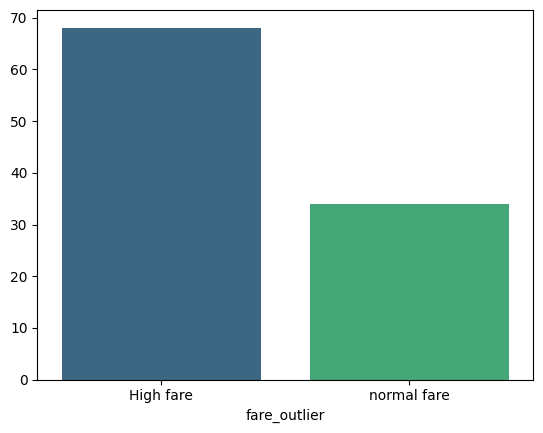

In [ ]:
sns.barplot(x=survived_rate_fare.index,y=survived_rate_fare.values,palette='viridis')

In [ ]:
#16)Are there any gender-based differences in survival within each class (Pclass)?


In [ ]:
survived_gender_by_pclass=titanic.groupby(['pclass','sex'])['survived'].mean().unstack()*100

In [ ]:
survived_gender_by_pclass

sex,female,male
pclass,,
1,96.808511,36.885246
2,92.105263,15.740741
3,50.000000,13.544669


<Axes: xlabel='pclass', ylabel='survived'>

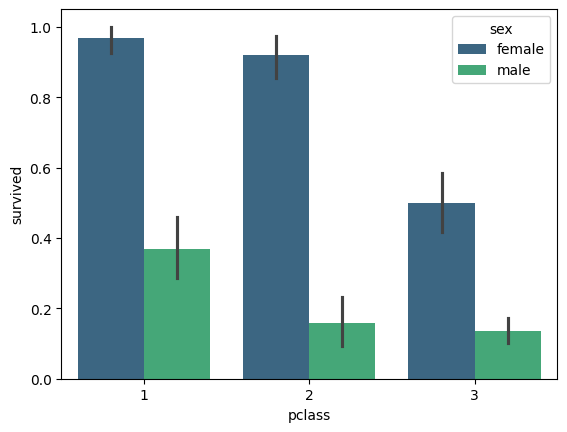

In [ ]:
sns.barplot(x='pclass',y='survived',hue='sex',data=titanic,palette='viridis')

In [ ]:
#17)How does survival vary among passengers who embarked from different ports (Embarked)
within the same class?

In [ ]:
survived_embarked_by_pclass=titanic.groupby(['pclass','embarked'])['survived'].mean().unstack()

In [ ]:
survived_embarked_by_pclass

embarked,C,Q,S
pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


<Axes: xlabel='pclass', ylabel='survived'>

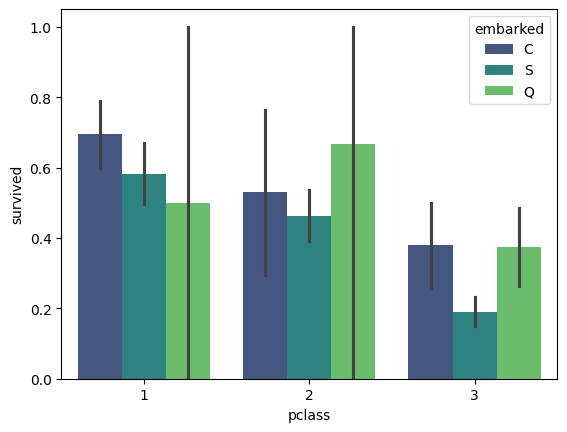

In [ ]:
sns.barplot(x='pclass',y='survived',hue='embarked',data=titanic,palette='viridis')

In [ ]:
#18)Create a heatmap to visualize the correlation between numeric features.

In [ ]:
corr_matrix=titanic.corr(numeric_only=True)

In [ ]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Family,faamilysize
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367,0.203367,0.016639
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207,-0.135207,0.065997
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,-0.198270,-0.301914
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471,0.584471,0.890712
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398,0.583398,0.783111
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.271832,0.217138
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744,-0.404744,-0.348143
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-1.000000,-0.690922
Family,0.203367,-0.135207,-0.198270,0.584471,0.583398,0.271832,-0.404744,-1.000000,1.000000,0.690922
faamilysize,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,-0.348143,-0.690922,0.690922,1.000000


<Axes: >

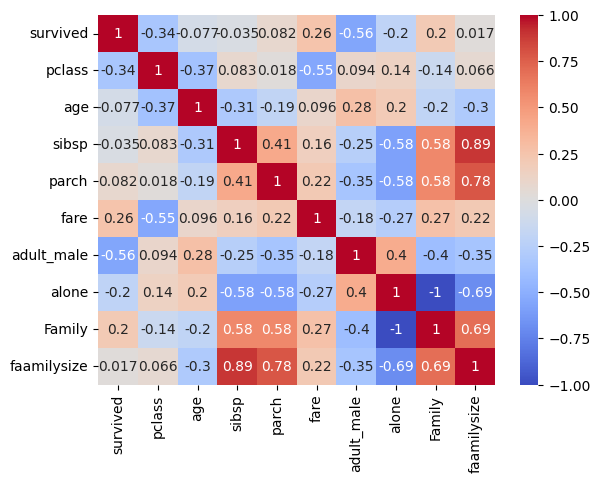

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
#19)Use a violin plot to visualize the distribution of Fare for survivors vs. non-survivors.

<ipython-input-102-7df49e9d6cca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived',y='fare',data=titanic,palette=['green','red'])


<Axes: xlabel='survived', ylabel='fare'>

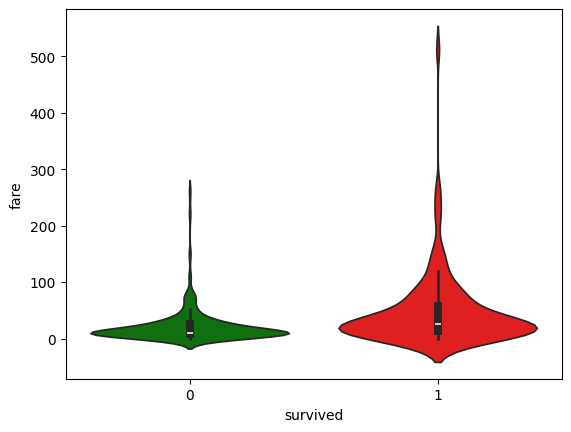

In [ ]:
sns.violinplot(x='survived',y='fare',data=titanic,palette=['green','red'])

In [ ]:
#19)Use a swarm plot to analyze the relationship between Pclass, Sex, and survival.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='pclass'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


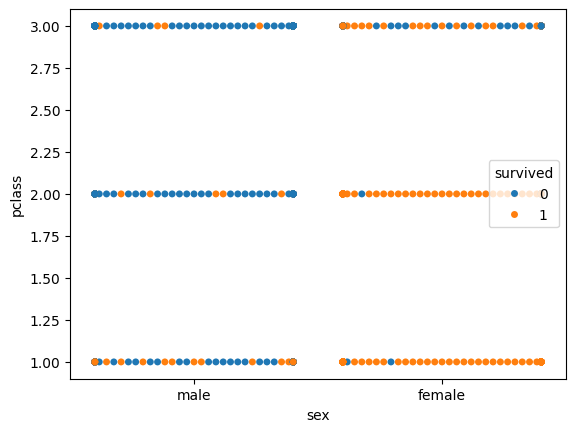

In [ ]:
sns.swarmplot(x='sex',y='pclass',hue='survived',data=titanic)

In [ ]:
#20)Use a box plot to analyze the fare distribution across different embarkation points.

<ipython-input-104-d3ff67a093cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='embarked',y='fare',data=titanic ,palette='viridis')


<Axes: xlabel='embarked', ylabel='fare'>

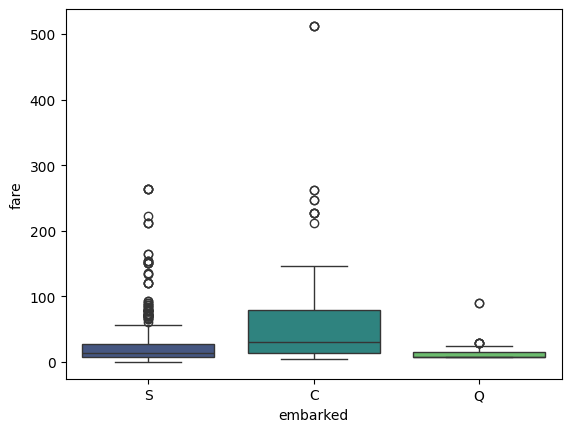

In [ ]:
sns.boxplot(x='embarked',y='fare',data=titanic ,palette='viridis')

In [ ]:
#21)Use a pair plot to identify patterns between Age, Fare, Pclass, and Survived.

In [ ]:
titanic_new=titanic[['age','fare','pclass','survived']]

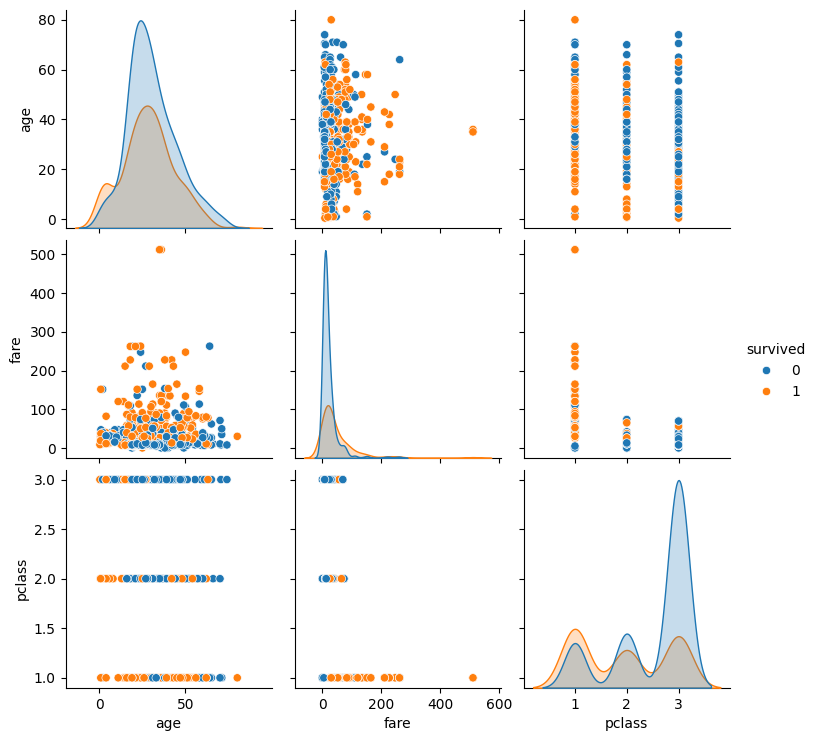

In [ ]:
sns.pairplot(titanic_new,hue='survived')

In [ ]:
#22)Can the dataset be stratified into groups (e.g., age, class, gender) with distinctly high or low
survival probabilities?

In [ ]:
titanic['age_cat']=pd.cut(titanic['age'],bins=[0,12,18,40,60,100],labels=['child','Teen','adult','middle_age','senior'])

In [ ]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,Family,faamilysize,fare_outlier,age_cat
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,21-30,True,2,normal fare,adult


In [ ]:
stratified_survival_rate=titanic.groupby(['age_cat','pclass','sex'])['survived'].mean().reset_index()

<ipython-input-109-54f3300432d0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_survival_rate=titanic.groupby(['age_cat','pclass','sex'])['survived'].mean().reset_index()


In [ ]:
stratified_survival_rate

,age_cat,pclass,sex,survived
0,child,1,female,0.000000
1,child,1,male,1.000000
2,child,2,female,1.000000
3,child,2,male,1.000000
4,child,3,female,0.478261
5,child,3,male,0.360000
6,Teen,1,female,1.000000
7,Teen,1,male,0.500000
8,Teen,2,female,1.000000
9,Teen,2,male,0.000000


<Axes: xlabel='age_cat', ylabel='survived'>

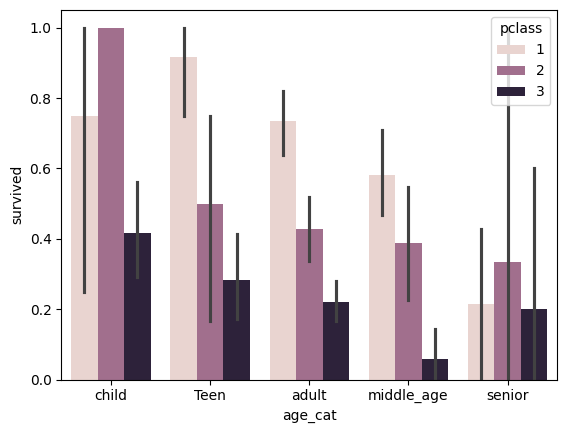

In [ ]:
sns.barplot(x='age_cat',y='survived',hue='pclass',data=titanic)

<Axes: xlabel='age_cat', ylabel='survived'>

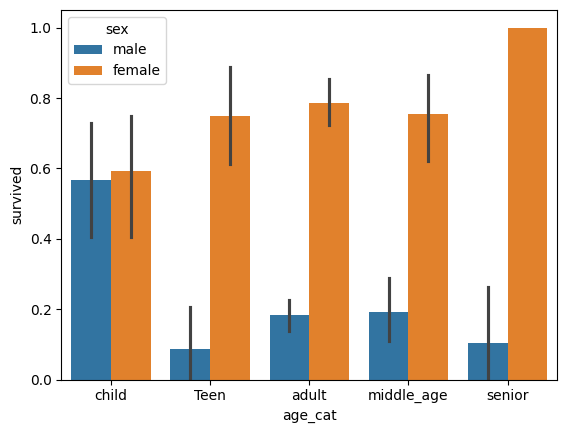

In [ ]:
sns.barplot(x='age_cat',y='survived',hue='sex',data=titanic)

In [ ]:
#23)What trends emerge when visualizing survival rates by age, grouped by gender and
passenger class

<Axes: xlabel='age', ylabel='survived'>

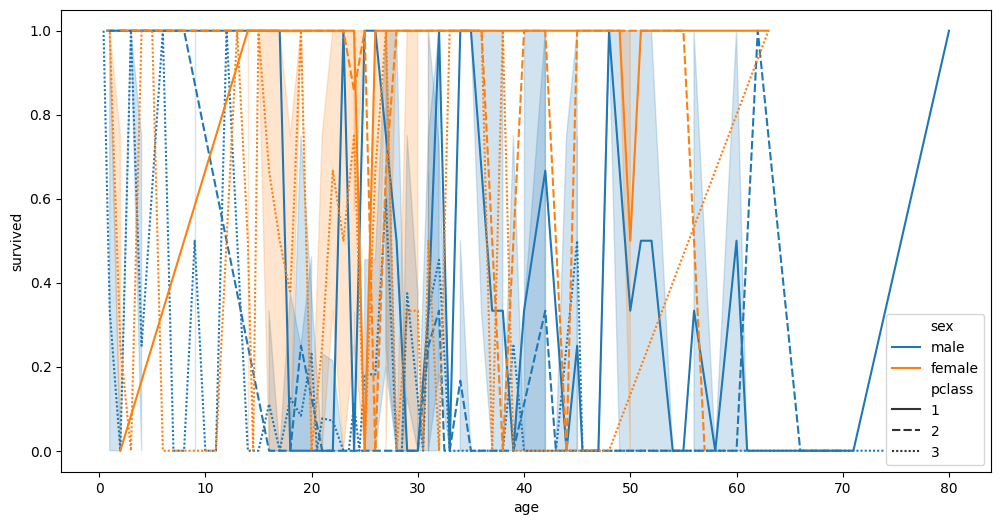

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='survived',hue='sex',style='pclass',data=titanic)